In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp 
import astropy as ap
from astropy.timeseries import LombScargle
import datetime
import random
from power_excess import *
#%matplotlib inline


Bad key animation.mencoder_args in file /Users/jzinn/.config/matplotlib/stylelib/jcz_paper_latex.mplstyle, line 485 ('animation.mencoder_args:          # Additional arguments to pass to mencoder')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


setting up graphics for ssh connection


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',
/Users/jzinn/SYDOSU/util.py:19: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use('jcz_paper_latex')
/Users/jzinn/SYDOSU/util.py:19: UserWarning: Style includes a parameter, 'savefig.directory', that is not related to style.  Ignoring this parameter.
  plt.style.use('jcz_paper_latex')
/Users/jzinn/SYDOSU/util.py:19: UserWarning: Style includes a parameter, 'tk.window_focus', that is not related to style.  Ignoring this parameter.
  plt.style.use('jcz_paper_latex')
/Users/jzinn/SYDOSU/util.py:19: UserWarning: Style includes a parameter, 'toolbar', that is not related to style.  Ignoring this parameter.
  plt.style.use('jcz_paper_latex')


Radial Velocity For Orbit 

In [2]:
time = np.linspace(0,15,100)

K = 44.6 #radial velocity amplitude for LOS binary orbit 

rad_vel = K * np.cos(time)

plt.plot(time, rad_vel)
plt.title('Radial Velocity For BH-GS Binary System') #BH = Blackhole, GS = Giant Star
plt.xlabel('Time in Days')
plt.ylabel('RV $\mathregular{kms^{-1}}$')

Text(0, 0.5, 'RV $\\mathregular{kms^{-1}}$')

Star Interior Radial Veloctiy Due To Seismic Oscillations

In [3]:
def noiserv(numax, dnu, time): 
    rv = Amp * np.sin(2 * np.pi * (numax + dnu )  * time)
    
    #currently trying to add noise to data
    sigma = 0.001
    mu =0 
    noise = np.random.normal(mu,sigma,rv.shape)
    noise_rv = rv + noise

def time_hr(time):
        time_hours = time * 1e6 / (3600) #with 0.1 = 27.78 hours
        return time_hours
    
def freq_plot(time, noise_rv):
    
    frequency, power = LombScargle(time, noise_rv).autopower(normalization = 'psd')
    return frequency, power

    #originally had this....but the orginial plot without the axis change doesnt normally look like what we are seeing
    #plt.axis([0,100 , 0, 1.05])
    #plt.xlabel('Frequency')
    #plt.ylabel('Power')
    #plt.title('Power Spectrum')
    #plt.plot(frequency, power)
    #plt.show()


def osc_plot(time_hours, noise_rv):
    
    start = 43
    end = 86
    
    if (len(time_hours) >= 100 ):
        plt.plot(time_hours, noise_rv, label = 'Continuous', color = 'Black' )
        #plt.plot(time_hours[:start], noise_rv[:start] )
        #plt.plot(time_hours[end:], noise_rv[end:])
    else: 
        plt.scatter(time_hours, noise_rv, label = f'{len(time_hours)} Samples', color = np.random.rand(3,))
        
    plt.title('Oscillations')
    plt.xlabel('Time (hours)')
    plt.ylabel('RV $\mathregular{kms^{-1}}$')
    plt.legend(loc = 'best')
    #plt.show()

def radial_velocity(time):
    noiserv(numax, i, time_hr(time))
    osc_plot(time_hr(time), noiserv(numax,i,time))
    freq_plot(time, noiserv(numax,i,time))
    #freq_plot(time[:43], noiserv(numax,time[:43]))
    
def random_time(time): 
    time_array = []
    for i  in range(len(time)):
        value = random.uniform(min(time),max(time)) 
        time_array.append(value)
    time_array.sort()
    return np.array(time_array)
    

In [4]:
time = np.linspace(0, 0.1, 100) # continuous observation 
t_10 = np.linspace(0, 0.025, 10) # 10 samples, 1 every 0.5 hours
t_20 = np.linspace(0, 0.1, 20) # 20 samples
t_02 = np.linspace(0,0.02,10)
t_03_05 = np.linspace(0.03,0.05, 10)

start_day = 1 
end_day = 10 
night_start_hour = 20
night_end_hour = 6
num_samples = 10

M = 4.4
R = 23
T_sun = 5772
T_gs = 4500
log_ggiant = 2.59 
g_giant = np.exp(log_ggiant)
g_sun = 2.7413e4

dnu = 3.6 # probably 1.6, I have it set to 3.6 normally

#numax = (g_giant / g_sun ) * (1 / np.sqrt(T_gs/T_sun)) * 3050 #in microhertz 
numax = M / R**2 * (1 / np.sqrt(T_gs/T_sun)) * 3050
print (f'numax = {numax}')

dnu_arr = np.array([-3 * dnu, -2*dnu, - dnu, 0, dnu, 2*dnu, 3*dnu])

L = 210
M = 4.4
b = np.exp(1.05*np.log(numax) - 1.91)*1.0
Amp = L/M * 23.5e-5 * np.exp(-(dnu_arr)**2/2.0/b**2)
Norm = L/M *23.5e-5

Amp_tot = []
for i in range(len(Amp)): 
    Amp_tot =+ Amp[i]

print ( ' Peak Velocity = ', Amp, Norm, Amp_tot)

#for i in dnu_arr:    
 #   radial_velocity(time)

numax = 28.73119886309358
 Peak Velocity =  [0.00112121 0.00403018 0.00868374 0.01121591 0.00868374 0.00403018
 0.00112121] 0.01121590909090909 0.001121211100425663


In [11]:
list_of_frequencies = [-3*dnu,-2*dnu,-1*dnu,0*dnu,1*dnu,2*dnu,3*dnu]
plt.clf()    

def plot(list_of_frequencies, time):
    global f_tot, p_tot, rv_total
    fig, ax = plt.subplots(4)
    rv_total = 0
    for i in range(len(list_of_frequencies)):
        rv = Amp[i] * np.sin(2 * np.pi * (numax + list_of_frequencies[i])  * time + np.random.uniform())
        rv_total =+ rv
        ax[0].scatter(time, rv)
        f,p =freq_plot(time,rv)
        ax[1].set_xlim(0,100)
        ax[1].scatter(f,p)
    ax[2].scatter(time, rv_total)
    f_tot, p_tot = freq_plot(time,rv_total)
    ax[3].set_xlim(0,100)
    ax[3].scatter(f_tot,p_tot)
    main()

In [12]:
plot(list_of_frequencies,time)

NameError: name 'f_tot' is not defined

[     0      1      2 ... 119977 119978 119979]
[[  3.62747558   1.26028304  -7.69817279 -14.26027263]
 [  3.62747558   1.26028304  -7.69817279 -14.26027263]
 [  3.62747558   1.26028304  -7.69817279 -14.26027263]
 ...
 [  3.67655799   1.10785836  -7.88115103 -14.26763671]
 [  3.67655799   1.10785836  -7.88115103 -14.26763671]
 [  3.67655799   1.10785836  -7.88115103 -14.26763671]]
False
False
-14.35323388360586
-14.35323388360586
16553.148364152166
^^^^
set best_fit to :
[  3.70264028   1.16075392  -7.76601389 -14.23145226]
set error to:
[2.29640347 0.78670277 8.15402979 0.08880317]
could not create an autocorrelation time array because the chain was not long enough. setting autocorrelations for all variables to zero.
[6.59718728e-07 6.59718728e-07 6.59718728e-07 ... 6.59718728e-07
 6.59718728e-07 6.59718728e-07]
[1.84259937e-06 1.75932374e-06 1.57664291e-06 ... 8.94831274e-07
 7.18512347e-07 4.48269765e-07]
[1.01149895e+00 3.03449685e+00 5.05749475e+00 ... 2.52571288e+03
 2.52773588e+

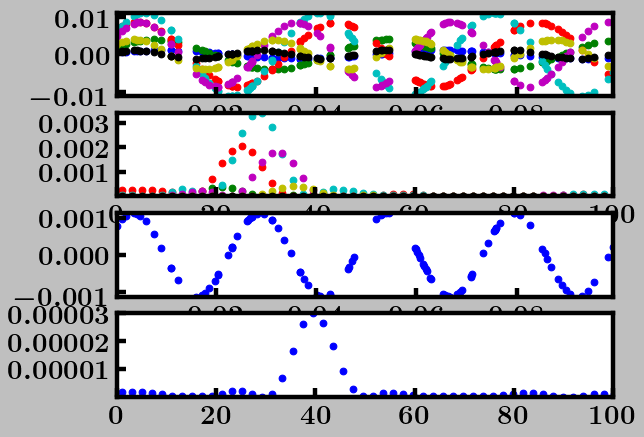

In [11]:
plot(list_of_frequencies, random_time(time))
main()

[     0      1      2 ... 119977 119978 119979]
[[  6.5698389    3.24935445  -8.51170293 -14.68466078]
 [  6.57010669   3.24749078  -8.50558275 -14.69902209]
 [  6.57010669   3.24749078  -8.50558275 -14.69902209]
 ...
 [  5.87542841   3.5192474   -8.46915478 -14.70419355]
 [  5.87542841   3.5192474   -8.46915478 -14.70419355]
 [  5.87651433   3.52243938  -8.45468321 -14.68856199]]
False
False
-15.0027537000244
-15.0027537000244
1682.1563352343564
^^^^
set best_fit to :
[  5.8881643    3.35110302  -8.60047282 -14.66275688]
set error to:
[0.37257763 0.1945001  0.39998432 0.11830077]
could not create an autocorrelation time array because the chain was not long enough. setting autocorrelations for all variables to zero.
[4.28593518e-07 4.28593518e-07 4.28593518e-07 4.28593518e-07
 4.28593518e-07 4.28593518e-07 4.28593518e-07 4.28593518e-07
 4.28593518e-07 4.28593518e-07 4.28593518e-07 4.28593518e-07
 4.28593518e-07 4.28593518e-07 4.28593518e-07 4.28593518e-07
 4.28593518e-07 4.28593518e-07

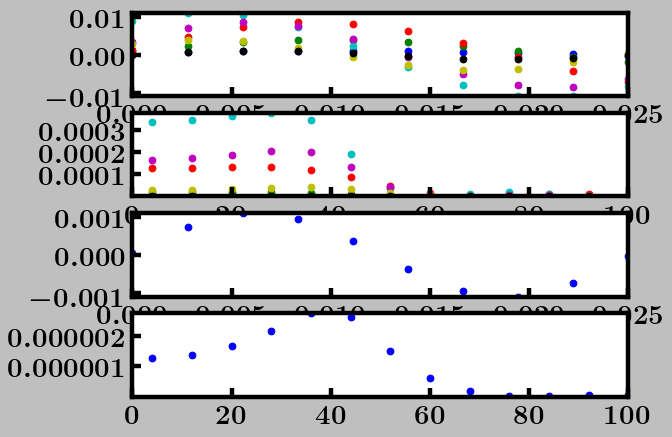

In [12]:
plot(list_of_frequencies, t_10)
main()

[     0      1      2 ... 119977 119978 119979]
[[  3.6737857    0.62432775  -9.05285981 -14.42348019]
 [  3.6737857    0.62432775  -9.05285981 -14.42348019]
 [  3.6737857    0.62432775  -9.05285981 -14.42348019]
 ...
 [  3.70131931   0.8861518   -9.06295669 -14.47604932]
 [  3.70131931   0.8861518   -9.06295669 -14.47604932]
 [  3.69661483   0.98558721  -9.04783504 -14.49893114]]
False
False
-14.750427807325858
-14.750427807325858
3359.9838587880904
^^^^
set best_fit to :
[  3.7026121    0.78746229  -8.94528395 -14.4658485 ]
set error to:
[1.08324664 0.21522663 0.32102359 0.06090199]
could not create an autocorrelation time array because the chain was not long enough. setting autocorrelations for all variables to zero.
[5.21869386e-07 5.21869386e-07 5.21869386e-07 5.21869386e-07
 5.21869386e-07 5.21869386e-07 5.21869386e-07 5.21869386e-07
 5.21869386e-07 5.21869386e-07 5.21869386e-07 5.21869386e-07
 5.21869387e-07 5.21869517e-07 5.21893033e-07 5.23737532e-07
 5.86347378e-07 1.49411530

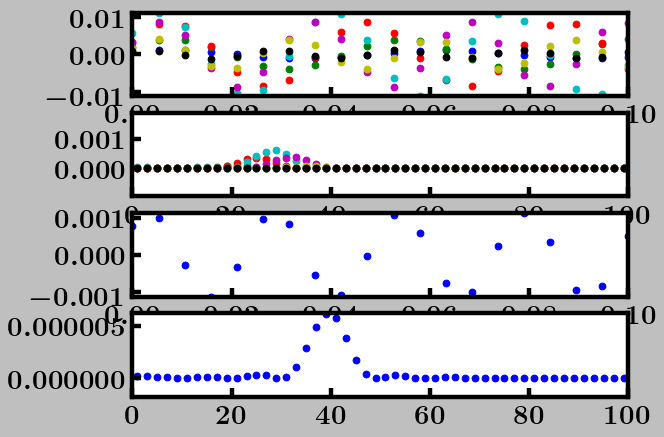

In [13]:
plot(list_of_frequencies, t_20)
main()

[     0      1      2 ... 119977 119978 119979]
[[  6.81574546   2.95263786  -7.7642628  -14.36611801]
 [  6.81574546   2.95263786  -7.7642628  -14.36611801]
 [  6.81451197   3.20660886  -7.84655142 -14.34968212]
 ...
 [  6.10160329   3.39543554  -8.16685737 -14.30484735]
 [  6.09110189   3.42262726  -7.98626433 -14.25584998]
 [  6.09110189   3.42262726  -7.98626433 -14.25584998]]
False
False
-14.714633095315437
-14.714633095315437
1642.8252154307706
^^^^
set best_fit to :
[  6.11815143   3.45470666  -8.19146829 -14.33927324]
set error to:
[0.35583419 0.19838102 0.41939435 0.0988355 ]
could not create an autocorrelation time array because the chain was not long enough. setting autocorrelations for all variables to zero.
[5.92287760e-07 5.92287760e-07 5.92287760e-07 5.92287760e-07
 5.92287760e-07 5.92287760e-07 5.92287760e-07 5.92287760e-07
 5.92287760e-07 5.92287760e-07 5.92287760e-07 5.92287760e-07
 5.92287760e-07 5.92287760e-07 5.92287760e-07 5.92287760e-07
 5.92287760e-07 5.92287760

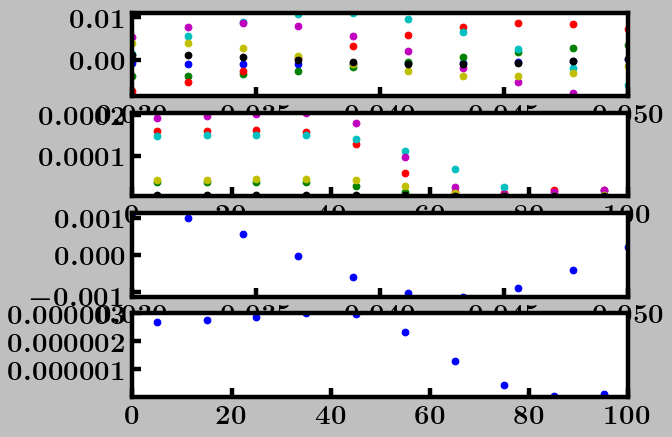

In [14]:
plot(list_of_frequencies, t_03_05)
main()